In [1]:
!pip install python-binance

In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
            'futuresDepth':      {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
            'futuresAllOrders':      {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOpenOrders':      {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)

In [3]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
{'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI', 'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
{'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN', 'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
{'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4', 'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
{'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr', 'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
{'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY', 'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
{'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B', 'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
{'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh', 'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
{'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7', 'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
{'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF', 'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
{'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g', 'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
{'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q', 'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
{'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS', 'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
{'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9', 'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [4]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [13]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['ZECUSDT', 'KNCUSDT', 'ZRXUSDT', 'SXPUSDT', 'RLCUSDT']


In [4]:
_LIMIT_ = 1000
_SYMBOL_ = 'ZECUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [5]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

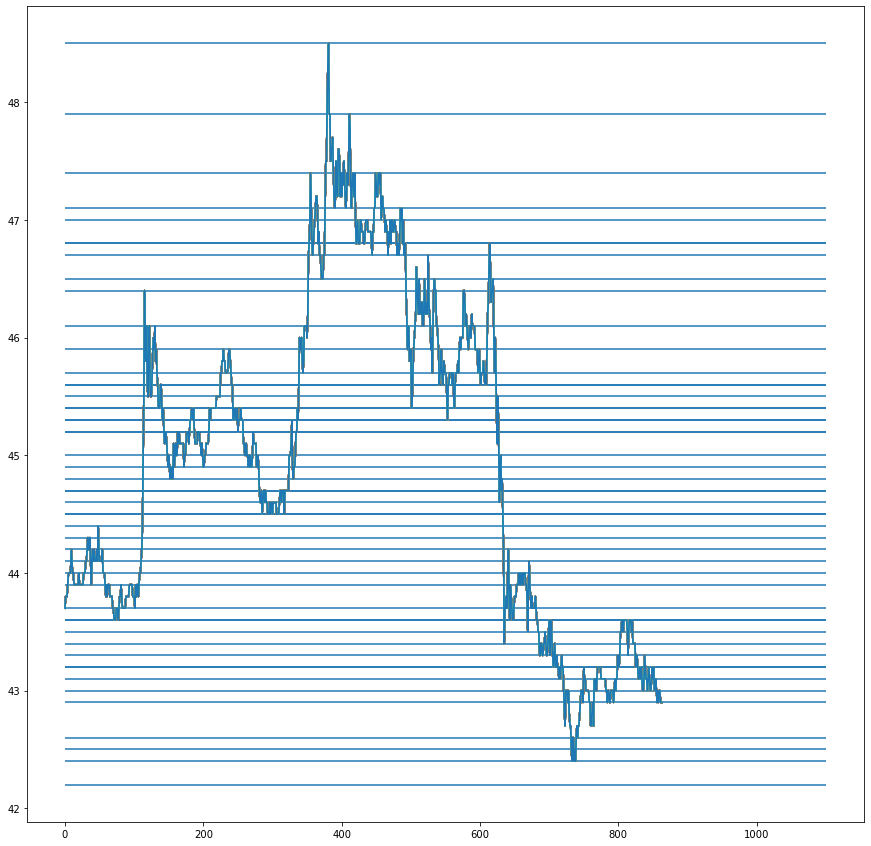

In [7]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [6]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
print(close_max_min)

[44.3, 44.4, 44.6, 44.8, 44.7, 44.5, 44.0, 44.0, 44.5, 44.6, 44.1, 44.3, 44.3, 44.2, 44.5, 45.2, 44.2, 44.7, 45.1, 45.4, 45.3, 44.5, 44.6, 44.8, 44.8, 44.7, 45.2, 45.2, 45.4, 45.3, 45.4, 45.6, 45.5, 48.1, 48.2, 48.6, 43.6, 43.6, 43.5, 44.1, 44.2, 43.8, 43.0, 42.9, 43.7, 43.8, 43.8, 43.6, 43.8, 43.7, 43.5, 44.0, 43.9, 44.2, 44.6, 44.7, 44.2, 44.1, 44.2, 44.3, 44.2, 43.5, 44.2, 44.5, 44.7, 44.7, 44.7, 44.4, 44.9, 44.6, 47.5, 47.5]


In [7]:
df=pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный'])
df

Empty DataFrame
Columns: [Монета, Тип операции, bids or asks, Цена входа, Время входа, Цена выхода, Время выхода, Правильный Неправильный]
Index: []

In [8]:
def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*taker*lots+float(deductible)*maker*lots)
    return profit
 
def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*taker*lots+float(deductible)*maker*lots)+start_sum
    return start_sum
 
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker):#Пробой asks и отcкок bids
    fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
    start=float(fuchers_last_price)
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        if float(fuchers_last_price)<float(start)*(1-stop_loss):
            end=float(fuchers_last_price)
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(fuchers_last_price)>float(start)*(1+take_profit):
            end=float(fuchers_last_price)
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, taker, maker)
    start_sum = start_sum_calculate(end, start, start_sum, lots, taker, maker)
    return profit, start_sum, right_answer, false_answer
    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker): #Пробой bids и отcкок asks
    fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
    start=float(fuchers_last_price)
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        if float(fuchers_last_price)<float(start)*(1-take_profit):
            end=float(fuchers_last_price)
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(fuchers_last_price)>float(start)*(1+stop_loss):
            end=float(fuchers_last_price)
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, taker, maker)
    start_sum = start_sum_calculate(start, end, start_sum, lots, taker, maker)
    return profit, start_sum, right_answer, false_answer

In [9]:
i=0
profit=0
start_sum=20
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
maker=0.000162
taker=0.000324
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(fuchers_last_price)))
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        lots=start_sum/float(fuchers_last_price)
        if TimeNow()[11:13]=='00':
            current_time='00'
        else:
            current_time=TimeNow()[11:13].lstrip('0')
        if current_time!='00' and current_time!='3' and current_time!='17':
            if float(fuchers_last_price) == nearest_close_max and nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
                profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker)

            fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
            lots=start_sum/float(fuchers_last_price)
            if float(fuchers_last_price) == nearest_close_min and nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
                profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker)

            fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
            lots=start_sum/float(fuchers_last_price)
            if float(fuchers_last_price) == nearest_bids:
                profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker)
                set(bids).remove(nearest_bids)            

            fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
            lots=start_sum/float(fuchers_last_price)
            if float(fuchers_last_price) == nearest_asks:
                profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker)
                set(asks).remove(nearest_asks)

        if i%15==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.45766590389016015
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.4577706569008927
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.4577706569008927
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.4577706569008927
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.4577706569008927
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.4577706569008927
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.4577706569008927
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 0.4577706569008927
Заработали: 0
Правильны

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильн

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4587008742646029
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.458595860328187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4588059363063493
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45891104648648817
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильны

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4584908944640698
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Работаем на отскок buy bids 43.8
Ошибка: ('Connection aborted.', ConnectionResetError(10054, 'Удаленный хост принудительно разорвал существующее подключение', None, 10054, None))
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Ошибка: ('Connection aborted.', ConnectionResetError(10054, 'Удаленный хост принудительно разорвал существующее подключение', None, 10054, None))
Ошибка: ('Connection aborted.', ConnectionResetError(10054, 'Удаленный хост принудительно разорвал существующее подключение', None, 10054, None))
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправ

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4564016217620234
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456505633070538
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильн

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4561937412693056
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4561937412693056
Заработали: 0.031467179135210584
Правильных ответов: 1 Непра

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45629765783907084
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4566096917970187
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.456713797973899
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45681795163364214
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45681795163364214
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45681795163364214
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45681795163364214
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправи

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправ

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4577574766712799
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправил

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4573394333135893
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4572350417515455
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4571306978351257
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неп

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45744387255389835
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4575483595051441
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4576528942000276
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправил

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4582811068207552
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4582811068207552
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4582811068207552
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4582811068207552
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45796678507396454
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправи

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4580715110710087
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4578621069516619
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4581762849756452
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4582811068207552
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4583859766392496
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправиль

Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45922666618833585
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.4593319692532724
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Заработали: 0.031467179135210584
Правильных ответов: 1 Неправильных ответов: 0
Конечеая сумма: 20.03146717913521 Кол-во торгуемых лотов: 0.45912141139434354
Работаем на отскок buy bids 43.6
Закрылись по тейку sell bi

Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4598456990087071
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4598456990087071
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46005658903347607
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46005658903347607
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46005658903347607
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4598456990087071
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправи

Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4605846613349378
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4605846613349378
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46079622985185786
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46079622985185786
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4609020870147
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4610079928251353
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильны

Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4617506984522414
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4617506984522414
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46185699465354263
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46185699465354263
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46185699465354263
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4617506984522414
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправи

Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4604789499139291
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4605846613349378
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4604789499139291
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4604789499139291
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.460373287006652
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4604789499139291
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильны

Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46185699465354263
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4619633398054315
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4619633398054315
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.46185699465354263
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4621761770962887
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправильных ответов: 0
Конечеая сумма: 20.063067847749892 Кол-во торгуемых лотов: 0.4620697339417294
Заработали: 0.06306784774989162
Правильных ответов: 2 Неправил

Заработали: 0.03014282863711657
Правильных ответов: 2 Неправильных ответов: 1
Конечеая сумма: 20.030142828637118 Кол-во торгуемых лотов: 0.46184327481293797
Заработали: 0.03014282863711657
Правильных ответов: 2 Неправильных ответов: 1
Конечеая сумма: 20.030142828637118 Кол-во торгуемых лотов: 0.46184327481293797
Заработали: 0.03014282863711657
Правильных ответов: 2 Неправильных ответов: 1
Конечеая сумма: 20.030142828637118 Кол-во торгуемых лотов: 0.46184327481293797
Заработали: 0.03014282863711657
Правильных ответов: 2 Неправильных ответов: 1
Конечеая сумма: 20.030142828637118 Кол-во торгуемых лотов: 0.46184327481293797
Заработали: 0.03014282863711657
Правильных ответов: 2 Неправильных ответов: 1
Конечеая сумма: 20.030142828637118 Кол-во торгуемых лотов: 0.46184327481293797
Заработали: 0.03014282863711657
Правильных ответов: 2 Неправильных ответов: 1
Конечеая сумма: 20.030142828637118 Кол-во торгуемых лотов: 0.4617368102498183
Заработали: 0.03014282863711657
Правильных ответов: 2 Непра

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.459485918817863
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.459485918817863
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.459485918817863
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.459485918817863
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.459485918817863
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4593805321392351
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных о

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45969683730251665
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45969683730251665
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45969683730251665
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45969683730251665
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45969683730251665
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45959135386118977
Заработали: 0.028991201270646187
Правильных ответов: 3 Неп

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4601192557149242
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправиль

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4601192557149242
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4601192557149242
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4601192557149242
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46001357834797085
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46001357834797085
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46001357834797085
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправ

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45969683730251665
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.45969683730251665
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4599079495125293
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправи

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправиль

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46022498164684394
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46022498164684394
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46022498164684394
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46022498164684394
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46022498164684394
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4601192557149242
Заработали: 0.028991201270646187
Правильных ответов: 3 Непр

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4604365793395552
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4603307561772156
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4604365793395552
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4604365793395552
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправиль

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46086035897999655
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46086035897999655
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46086035897999655
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.46086035897999655
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.461178705992877
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4610725414657148
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправ

Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4607543409540062
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4607543409540062
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4607543409540062
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4607543409540062
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4607543409540062
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправильных ответов: 2
Конечеая сумма: 20.02899120127065 Кол-во торгуемых лотов: 0.4607543409540062
Заработали: 0.028991201270646187
Правильных ответов: 3 Неправиль

Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45905067543147643
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45894531608434963
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45894531608434963
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45905067543147643
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45905067543147643
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45905067543147643
Заработали: -0.0037525782048883766
Прави

Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45894531608434963
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45894531608434963
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45894531608434963
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4588400050893785
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45894531608434963
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.45894531608434963
Заработали: -0.0037525782048883766
Правил

Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4595781986162978
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4595781986162978
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4594725970081598
Ошибка: HTTPSConnectionPool(host='fapi.binance.com', port=443): Max retries exceeded with url: /fapi/v1/ticker/price?symbol=ZECUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000299313D7970>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера'))
Заработали: -0

Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4600010909085603
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4600010909085603
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4600010909085603
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4598952948894921
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4598952948894921
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4600010909085603
Заработали: -0.0037525782048883766
Правильных 

Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.4605308019759354
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.46063689061956037
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.46063689061956037
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.46063689061956037
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.46063689061956037
Заработали: -0.0037525782048883766
Правильных ответов: 3 Неправильных ответов: 3
Конечеая сумма: 19.996247421795115 Кол-во торгуемых лотов: 0.46063689061956037
Заработали: -0.0037525782048883766
Правил

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46030757717341075
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных отв

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4597792167772061
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4597792167772061
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4597792167772061
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4597792167772061
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4597792167772061
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4597792167772061
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46030757717341075
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46030757717341075
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46030757717341075
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46030757717341075
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46030757717341075
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46030757717341075
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных отв

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4604133950072437
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных отве

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46168701435719456
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4618999696221195
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4618999696221195
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4615806103437451
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4615806103437451
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4621131214308975
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов:

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46221977112428114
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4620065209415248
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4618999696221195
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4618999696221195
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4617934674386696
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4618999696221195
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов:

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных отв

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4609432147943636
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46126169237252646
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46126169237252646
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46126169237252646
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46126169237252646
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных отв

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4615806103437451
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46147425536440323
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46147425536440323
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46147425536440323
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46147425536440323
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных отве

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46136794938528225
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46126169237252646
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4611554842923118
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4611554842923118
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4611554842923118
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответо

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46126169237252646
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46126169237252646
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4610493251108449
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4611554842923118
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4604133950072437
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4604133950072437
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4604133950072437
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4604133950072437
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4604133950072437
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4605192615041412
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4607311406214654
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46062517669767944
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.4605192615041412
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответ

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.459990415315
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.459990415315
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.459990415315
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.459990415315
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сум

Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46020180796909693
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46020180796909693
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.459990415315
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Заработали: 0.02798268281509715
Правильных ответов: 4 Неправильных ответов: 3
Конечеая сумма: 20.0279826828151 Кол-во торгуемых лотов: 0.46009608736078794
Работаем на отскок buy bids 43.53
Закрылись по стопу sell bids 43.48
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.459872394949858
Зара

Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4594497181162643
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45934417028301916
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45934417028301916
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4594497181162643
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4594497181162643
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4594497181162643
Заработали: -0.004748267580178385
Правильных ответ

Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45892246344778115
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45892246344778115
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4588171576966458
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4588171576966458
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4588171576966458
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4588171576966458
Заработали: -0.004748267580178385
Правильных ответ

Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4592386709329312
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4592386709329312
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4591332200326022
Заработали: -0.004748267580178385
Правильных отве

Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45902781754866445
Заработали: -0.004748267580178385
Правильных о

Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45966095936597295
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45966095936597295
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45966095936597295
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4595553144660957
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4595553144660957
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.45966095936597295
Заработали: -0.004748267580178385
Правильных отв

Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.459872394949858
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4597666528493866
Заработали: -0.004748267580178385
Правильных ответов: 4 Неправильных ответов: 4
Конечеая сумма: 19.995251732419824 Кол-во торгуемых лотов: 0.4597666528493866
Работаем на отскок buy asks 43.52
Закрылись по стопу sell asks 43.57
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4594497181162643
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45827726888497106
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.458

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45838249902708017
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45848777750641573
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45848777750641573
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45848777750641573
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45848777750641573
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45838249902708017
Заработали: -0.037442167370662076
Правильных ответов

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.46007277788959067
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.460178834316029
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.460178834316029
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.460178834316029
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.460178834316029
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.46028493965020384
Заработали: -0.037442167370662076
Правильных ответов: 4 Непр

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.460178834316029
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.460178834316029
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4599667703370816
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4599667703370816
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4599667703370816
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.46007277788959067
Заработали: -0.037442167370662076
Правильных ответов: 4 Неп

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4603910939259534
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4604972971771474
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4604972971771474
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.46028493965020384
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4603910939259534
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4603910939259534
Заработали: -0.037442167370662076
Правильных ответов: 4 Н

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45943746450240136
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45943746450240136
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45943746450240136
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45943746450240136
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45912046533186157
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45912046533186157
Заработали: -0.037442167370662076
Правильных ответов

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45764690125239205
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45775184206900577
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45775184206900577
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45775184206900577
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Непра

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45754200854066784
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45754200854066784
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45764690125239205
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45775184206900577
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Не

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457437163900764
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457437163900764
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45701826539902335
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.45712291808173433
Заработали: -0.037442167370662076
Правильных ответов: 4 Не

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Непра

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457437163900764
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457437163900764
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Непр

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4580669534793332
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4580669534793332
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4580669534793332
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4580669534793332
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4580669534793332
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4580669534793332
Заработали: -0.037442167370662076
Правильных ответов: 4 Не

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4572276187042909
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4573323672996413
Заработали: -0.037442167370662076
Правильных ответов: 4 Не

Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.457961868149331
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправильных ответов: 5
Конечеая сумма: 19.96255783262934 Кол-во торгуемых лотов: 0.4578568310236087
Заработали: -0.037442167370662076
Правильных ответов: 4 Неправ

Заработали: -0.006033898204843015
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 19.99396610179516 Кол-во торгуемых лотов: 0.4580519152759487
Заработали: -0.006033898204843015
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 19.99396610179516 Кол-во торгуемых лотов: 0.4580519152759487
Заработали: -0.006033898204843015
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 19.99396610179516 Кол-во торгуемых лотов: 0.4581568767597424
Заработали: -0.006033898204843015
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 19.99396610179516 Кол-во торгуемых лотов: 0.4581568767597424
Заработали: -0.006033898204843015
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 19.99396610179516 Кол-во торгуемых лотов: 0.4580519152759487
Заработали: -0.006033898204843015
Правильных ответов: 5 Неправильных ответов: 5
Конечеая сумма: 19.99396610179516 Кол-во торгуемых лотов: 0.4581568767597424
Заработали: -0.006033898204843015
Правильных ответов: 5 Не

Закрылись по стопу sell asks 43.75
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577373191802921
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45615460062153335
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45615460062153335
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.456258912215547
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45615460062153335
Заработали: -0.04779776881

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неп

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45563375727759464
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45563375727759464
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправи

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45521793819725914
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45521793819725914
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4551141019887287
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45521793819725914
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45521793819725914
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4551141019887287
Заработали: -0.04779776881413556
Правильных ответов: 5 Непра

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45542575282323366
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45542575282323366
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45542575282323366
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45542575282323366
Заработали: -0.04779776881413556
Правильных ответов: 5 Непра

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45594612045671545
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.456258912215547
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45636327152758166
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45636327152758166
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4555297313056135
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45573783077171925
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправил

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45573783077171925
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45573783077171925
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45573783077171925
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45573783077171925
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45573783077171925
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Непра

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45521793819725914
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45521793819725914
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45521793819725914
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4553218217979431
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4553218217979431
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4553218217979431
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправ

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45542575282323366
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45542575282323366
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45542575282323366
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4553218217979431
Ошибка: HTTPSConnectionPool(host='fapi.binance.com', port=443): Max retries exceeded with url: /fapi/v1/ticker/price?symbol=ZECUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000029931501730>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое 

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45615460062153335
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45615460062153335
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Непра

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45605033671281986
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45594612045671545
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45594612045671545
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45594612045671545
Заработали: -0.04779776881413556
Правильных ответов: 5 Неп

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.455841951820559
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных от

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4569904313143809
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Непр

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправил

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных 

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4573046580606433
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправи

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных о

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458882296025434
Заработали: -0.04779776881413556
Правильных ответов: 5 Непра

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4582499364075762
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправ

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправи

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Непра

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Непр

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неп

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильн

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4569904313143809
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4569904313143809
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4582499364075762
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправи

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправ

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4575143827375801
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неп

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4587767815862467
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4587767815862467
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4587767815862467
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4587767815862467
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4587767815862467
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458882296025434
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильн

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458882296025434
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458882296025434
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458882296025434
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4587767815862467
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458882296025434
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458987859010487
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных о

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45909347057491645
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45919913075226393
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45909347057491645
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458987859010487
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4587767815862467
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458882296025434
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправил

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4571998678090254
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45709512557126847
Заработали: -0.04779776881413556
Правильных ответов: 5 Непра

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4567811866113981
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4567811866113981
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4568857850054011
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4573046580606433
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4573046580606433
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4573046580606433
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4573046580606433
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4573046580606433
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4573046580606433
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправиль

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных от

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.458039536987738
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.457934409712781
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных от

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4584605292092341
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45856589821158056
Заработали: -0.04779776881413556
Правильных ответов: 5 Непр

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45835520861901835
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4582499364075762
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4582499364075762
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4582499364075762
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4581447125415814
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4582499364075762
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправил

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45782933068347564
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45761931722903365
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.4577242998666177
Заработали: -0.04779776881413556
Правильных ответов: 5 Непр

Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Заработали: -0.04779776881413556
Правильных ответов: 5 Неправильных ответов: 6
Конечеая сумма: 19.95220223118587 Кол-во торгуемых лотов: 0.45867131565944524
Работаем на отскок buy bids 43.49
Закрылись по тейку sell bids 43.58
Заработали: -0.016218006686680976
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 19.983781993313322 Кол-во торгуемых лотов: 0.458553969557442
Заработали: -0.016218006686680976
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 19.983781993313322 Кол-во торгуемых лотов: 0.458553969557442
Заработали: -0.016218006686680976
Правильных ответов: 6 Неправильных ответов: 6
Конечеая сумма: 19.983781993313322 Кол-во торгуемых лотов: 0.45855

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45980536375023184
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4595942017002892
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4593832335103877
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Н

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неп

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4582263618142764
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4582263618142764
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4582263618142764
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45833129113917087
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45833129113917087
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45833129113917087
Заработали: 0.015327484047591045
Правильных ответов: 7 

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Не

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов:

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45980536375023184
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.46001671992754756
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов:

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4595942017002892
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4595942017002892
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4595942017002892
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4595942017002892
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Н

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4586463676454535
Заработали: 0.015327484047591045
Правильных ответов: 7 Неп

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4592778220295455
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4592778220295455
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4592778220295455
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4592778220295455
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4593832335103877
Заработали: 0.015327484047591045
Правильных ответов: 7 Неп

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4590671441295319
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45896187764383384
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45885665942337445
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Н

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4585412940217089
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4584362685306366
Заработали: 0.015327484047591045
Правильных ответов: 7 Неп

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4590671441295319
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4590671441295319
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45896187764383384
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45896187764383384
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4587514894349666
Заработали: 0.015327484047591045
Правильных ответов: 7 Н

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4591724589136864
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4592778220295455
Заработали: 0.015327484047591045
Правильных ответов: 7 Неп

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.4595942017002892
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45980536375023184
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 

Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45980536375023184
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45980536375023184
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45980536375023184
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45980536375023184
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов: 7 Неправильных ответов: 6
Конечеая сумма: 20.015327484047592 Кол-во торгуемых лотов: 0.45969975847605865
Заработали: 0.015327484047591045
Правильных ответов:

Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.45979294443924285
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.45937014632941364
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.45937014632941364
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.45937014632941364
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.45937014632941364
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4592645682677429
Заработали: -0.01739863467050906
Правильных ответов: 

Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4592645682677429
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4592645682677429
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4592645682677429
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4592645682677429
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4592645682677429
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4591590387254019
Заработали: -0.01739863467050906
Правильных ответов: 7 Неп

Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4602165215414439
Заработали: -0.01739863467050906
Правильных ответов: 

Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4602165215414439
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4602165215414439
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4602165215414439
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46032253778690385
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46032253778690385
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46032253778690385
Заработали: -0.01739863467050906
Правильных ответов: 7 

Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.46000463548180237
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4598987656002185
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4598987656002185
Заработали: -0.01739863467050906
Правильных ответов: 7 Неправильных ответов: 7
Конечеая сумма: 19.982601365329494 Кол-во торгуемых лотов: 0.4598987656002185
Заработали: -0.01739863467050906
Правильных ответов: 7 

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4614787828959487
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4615851879646358
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4615851879646358
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4615851879646358
Заработали: 0.018949602026252357
Правильных ответов: 8 Неп

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4612661198623561
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4612661198623561
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4612661198623561
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неп

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4597829490589401
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4598885734442052
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4598885734442052
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4598885734442052
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4600999678700587
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4600999678700587
Заработали: 0.018949602026252357
Правильных ответов: 8 Неп

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неп

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46094749256334916
Заработали: 0.018949602026252357
Правильных ответов:

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4614787828959487
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4614787828959487
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4614787828959487
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4615851879646358
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4615851879646358
Заработали: 0.018949602026252357
Правильных ответов: 8 Неп

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46115986182967644
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4612661198623561
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46115986182967644
Заработали: 0.018949602026252357
Правильных ответов: 8 Н

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4605233402812573
Заработали: 0.018949602026252357
Правильных ответов: 8 Неп

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4615851879646358
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4616916421131516
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46190469778556187
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4614787828959487
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4614787828959487
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4614787828959487
Заработали: 0.018949602026252357
Правильных ответов: 8 Не

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4613724268731563
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46084138126211455
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46094749256334916
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46094749256334916
Заработали: 0.018949602026252357
Правильных ответов: 8 

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4612661198623561
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4612661198623561
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4612661198623561
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46115986182967644
Заработали: 0.018949602026252357
Правильных ответов: 8 

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46020573797761505
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46020573797761505
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46020573797761505
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46020573797761505
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46020573797761505
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46020573797761505
Заработали: 0.018949602026252357
Правильных ответов:

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46084138126211455
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46084138126211455
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46084138126211455
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46094749256334916
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов:

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4605233402812573
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4603115567262877
Заработали: 0.018949602026252357
Правильных ответов: 8 Неп

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4605233402812573
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46190469778556187
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46190469778556187
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46190469778556187
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46190469778556187
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов:

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.462331399584902
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4622246502430444
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.462331399584902
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.462331399584902
Заработали: 0.018949602026252357
Правильных ответов: 8 Непр

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4620112993774811
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46211795018527824
Заработали: 0.018949602026252357
Правильных ответов: 

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46105365274127713
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов:

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4605233402812573
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46062930515476885
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4607353188038263
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.46094749256334916
Заработали: 0.018949602026252357
Правильных ответов: 8 

Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4603115567262877
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4604174241496379
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4603115567262877
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4603115567262877
Заработали: 0.018949602026252357
Правильных ответов: 8 Неправильных ответов: 7
Конечеая сумма: 20.018949602026254 Кол-во торгуемых лотов: 0.4603115567262877
Работаем на отскок buy asks 43.5
Закрылись по стопу sell asks 43.55
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46020573

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправиль

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4592418744934354
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4592418744934354
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4593474230741051
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4593474230741051
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправиль

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4604055834589798
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4604055834589798
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4605116676947998
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправиль

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4609364939565109
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4609364939565109
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46083021392562395
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46083021392562395
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46083021392562395
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4609364939565109
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправ

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4602995480873862
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4604055834589798
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4604055834589798
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправи

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4601935615462655
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправил

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.45966436011854445
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.45966436011854445
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.45966436011854445
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.45966436011854445
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.45966436011854445
Заработали: -0.01379362204569087
Правильных ответов: 8 Непр

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4595586658531688
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.45966436011854445
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправил

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4594530201828577
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4592418744934354
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4592418744934354
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправиль

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46008762380189483
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4602995480873862
Заработали: -0.01379362204569087
Правильных ответов: 8 Непр

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46061780082863124
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46061780082863124
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4605116676947998
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4605116676947998
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4605116676947998
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4605116676947998
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправи

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46072398289429023
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46072398289429023
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46072398289429023
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4609364939565109
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46072398289429023
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46072398289429023
Заработали: -0.01379362204569087
Правильных ответов: 8 Непр

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46136210475425465
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46136210475425465
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46136210475425465
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4614686302921799
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4616818290125736
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4615752050335869
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправ

Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4610428230208607
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4609364939565109
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4610428230208607
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.4610428230208607
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46114920115261443
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправильных ответов: 8
Конечеая сумма: 19.98620637795431 Кол-во торгуемых лотов: 0.46114920115261443
Заработали: -0.01379362204569087
Правильных ответов: 8 Неправи

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправиль

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46092567851170924
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46092567851170924
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46092567851170924
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправ

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46177629106720947
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46177629106720947
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46177629106720947
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46177629106720947
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4618828384347838
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4618828384347838
Заработали: 0.018002217763529928
Правильных ответов: 9 Непра

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4624163136466512
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4624163136466512
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46263004894299814
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46263004894299814
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4627369907018847
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4627369907018847
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправи

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4638091338684785
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Непр

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46370169603343825
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46295102261247756
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4638091338684785
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46391662150089297
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Непр

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4648862567989672
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4645625949817482
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4645625949817482
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4646704321672129
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4646704321672129
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4645625949817482
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправиль

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46477831942799
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4648862567989672
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46477831942799
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильн

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4648862567989672
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46499424431506464
Заработали: 0.018002217763529928
Правильных ответов: 9 Непр

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4641317462963953
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4641317462963953
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправи

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4643470706973679
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4641317462963953
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Непра

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46295102261247756
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46305811283283677
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46402415896531135
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4641317462963953
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Непр

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4641317462963953
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4641317462963953
Заработали: 0.018002217763529928
Правильных ответов: 9 Непра

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4645625949817482
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4645625949817482
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46423938352883887
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправ

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4638091338684785
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46391662150089297
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46391662150089297
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46391662150089297
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Непр

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46316525260905905
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46348696961712277
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46370169603343825
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46370169603343825
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4638091338684785
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46359430796117485
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46370169603343825
Заработали: 0.018002217763529928
Правильных ответов: 9 Непр

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4646704321672129
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4644548078367408
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправиль

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46337968096674836
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46327244197555034
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46284398191360765
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46284398191360765
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46284398191360765
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46284398191360765
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46284398191360765
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46284398191360765
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Непр

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46220277575071644
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправ

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4618828384347838
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4618828384347838
Заработали: 0.018002217763529928
Правильных ответов: 9 Непра

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4618828384347838
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправил

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправиль

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправ

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправиль

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4610318336656732
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправиль

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4611380377277939
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4612442907318786
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправиль

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46145694370132617
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46156334373446006
Заработали: 0.018002217763529928
Правильных ответов: 9 Неп

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46156334373446006
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4613505927117661
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправил

Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4618828384347838
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.4620960807424638
Заработали: 0.018002217763529928
Правильных ответов: 9 Неправильных ответов: 8
Конечеая сумма: 20.01800221776353 Кол-во торгуемых лотов: 0.46198943498184936
Заработали: 0.018002217763529928
Правильных ответов: 9 Непра

Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.4625126317422617
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.46240561817637965
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.4625126317422617
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.4625126317422617
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.4625126317422617
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.4625126317422617
Заработали: -0.014829182416872968
Правильных ответов: 9 Н

Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.46240561817637965
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.46229865411943394
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.46229865411943394
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.4625126317422617
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.4625126317422617
Заработали: -0.014829182416872968
Правильных ответов: 9 Неправильных ответов: 9
Конечеая сумма: 19.98517081758313 Кол-во торгуемых лотов: 0.46240561817637965
Заработали: -0.014829182416872968
Правильных ответов: 

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Непра

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4628229832773817
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправил

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46303690654212737
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправиль

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4632510276549792
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4632510276549792
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4631439423503896
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4634653468905356
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4634653468905356
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4634653468905356
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4634653468905356
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4634653468905356
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4634653468905356
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4628229832773817
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4626092575866509
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4621823978333991
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4621823978333991
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4622890389035037
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4622890389035037
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4622890389035037
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4622890389035037
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46207580595198
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46207580595198
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46207580595198
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46207580595198
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46207580595198
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46207580595198
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46175632509974307
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46175632509974307
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46175632509974307
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4618627696191298
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4618627696191298
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4618627696191298
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправи

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4629299201958838
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4629299201958838
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4629299201958838
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4629299201958838
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4629299201958838
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4629299201958838
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4628229832773817
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4628229832773817
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4628229832773817
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46250246874602613
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправил

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4622890389035037
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4622890389035037
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4622890389035037
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4623957291963502
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильн

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4628229832773817
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46303690654212737
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4628229832773817
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4627160957523754
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправиль

Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.46207580595198
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4619692632252214
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4619692632252214
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4619692632252214
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4619692632252214
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных ответов: 9
Конечеая сумма: 20.035606946077852 Кол-во торгуемых лотов: 0.4619692632252214
Заработали: 0.0356069460778492
Правильных ответов: 10 Неправильных

Заработали: 0.0027780846208363737
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 20.00277808462084 Кол-во торгуемых лотов: 0.4612123146096574
Заработали: 0.0027780846208363737
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 20.00277808462084 Кол-во торгуемых лотов: 0.4612123146096574
Заработали: 0.0027780846208363737
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 20.00277808462084 Кол-во торгуемых лотов: 0.46131868276339577
Заработали: 0.0027780846208363737
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 20.00277808462084 Кол-во торгуемых лотов: 0.46131868276339577
Заработали: 0.0027780846208363737
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 20.00277808462084 Кол-во торгуемых лотов: 0.46131868276339577
Заработали: 0.0027780846208363737
Правильных ответов: 10 Неправильных ответов: 10
Конечеая сумма: 20.00277808462084 Кол-во торгуемых лотов: 0.46131868276339577
Заработали: 0.0027780846208363737
Правильн

Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4608813671415913
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4607749526028838
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4607749526028838
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4607749526028838
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4607749526028838
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.46098783084386463
Заработали: -0.043836802769102415
Правильных ответо

Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных ответов

Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.46173445620617537
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.46173445620617537
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.46173445620617537
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.46173445620617537
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных ответов: 10 Неправильных ответов: 11
Конечеая сумма: 19.9561631972309 Кол-во торгуемых лотов: 0.4618413144464453
Заработали: -0.043836802769102415
Правильных отв

Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4623663002932885
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4623663002932885
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4623663002932885
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4624736276610447
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4624736276610447
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4624736276610447
Заработали: -0.0766361203621998
Правильных ответов: 

Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4624736276610447
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4624736276610447
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.4624736276610447
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.46258100486737413
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.46258100486737413
Заработали: -0.0766361203621998
Правильных ответов: 10 Неправильных ответов: 12
Конечеая сумма: 19.923363879637805 Кол-во торгуемых лотов: 0.46258100486737413
Заработали: -0.0766361203621998
Правильных ответо

Заработали: -0.10948394317397594
Правильных ответов: 10 Неправильных ответов: 13
Конечеая сумма: 19.89051605682603 Кол-во торгуемых лотов: 0.46192559351662865
Заработали: -0.10948394317397594
Правильных ответов: 10 Неправильных ответов: 13
Конечеая сумма: 19.89051605682603 Кол-во торгуемых лотов: 0.46171114338036284
Заработали: -0.10948394317397594
Правильных ответов: 10 Неправильных ответов: 13
Конечеая сумма: 19.89051605682603 Кол-во торгуемых лотов: 0.46171114338036284
Заработали: -0.10948394317397594
Правильных ответов: 10 Неправильных ответов: 13
Конечеая сумма: 19.89051605682603 Кол-во торгуемых лотов: 0.46171114338036284
Заработали: -0.10948394317397594
Правильных ответов: 10 Неправильных ответов: 13
Конечеая сумма: 19.89051605682603 Кол-во торгуемых лотов: 0.46171114338036284
Заработали: -0.10948394317397594
Правильных ответов: 10 Неправильных ответов: 13
Конечеая сумма: 19.89051605682603 Кол-во торгуемых лотов: 0.46160399296416865
Заработали: -0.10948394317397594
Правильных от

Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46073777129149046
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46073777129149046
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46073777129149046
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4606308963735384
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4604172952159341
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4606308963735384
Заработали: -0.14220205733676775
Правильных ответ

Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.460524071026513
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46073777129149046
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46073777129149046
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46073777129149046
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46073777129149046
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4606308963735384
Заработали: -0.14220205733676775
Правильных ответ

Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46170188194985445
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4615945593366629
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46170188194985445
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46180925448054044
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46180925448054044
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4619166769635552
Заработали: -0.14220205733676775
Правильных отве

Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4619166769635552
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4620241494337655
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4619166769635552
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.4619166769635552
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46180925448054044
Заработали: -0.14220205733676775
Правильных ответов: 10 Неправильных ответов: 14
Конечеая сумма: 19.85779794266324 Кол-во торгуемых лотов: 0.46180925448054044
Заработали: -0.14220205733676775
Правильных ответо

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45997814893225913
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45997814893225913
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных от

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45987145021991116
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45987145021991116
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45987145021991116
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45987145021991116
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.459551650880398
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45976480099676187
Заработали: -0.17494178101963836
Правильных отве

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45987145021991116
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45987145021991116
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45987145021991116
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45976480099676187
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45976480099676187
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45976480099676187
Заработали: -0.17494178101963836
Правильных от

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.4593386983081643
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.4593386983081643
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.459551650880398
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.459551650880398
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.459551650880398
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.4594451499184327
Заработали: -0.17494178101963836
Правильных ответов: 10

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45997814893225913
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46008489716826106
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.45997814893225913
Заработали: -0.17494178101963836
Правильных от

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46061938241125394
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46061938241125394
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46061938241125394
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46061938241125394
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46061938241125394
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46061938241125394
Заработали: -0.17494178101963836
Правильных от

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46094067005301953
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46094067005301953
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46094067005301953
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46094067005301953
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46094067005301953
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46094067005301953
Заработали: -0.17494178101963836
Правильных от

Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.461047865557683
Заработали: -0.17494178101963836
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82505821898037 Кол-во торгуемых лотов: 0.46126240621173503
Работаем на отскок buy bids 42.98
Закрылись по тейку sell bids 43.07
Заработали: -0.1430765931667698
Правильных ответов: 11 Неправильных ответов: 15
Конечеая сумма: 19.85692340683324 Кол-во торгуемых лотов: 0.46103838882826187
Заработали: -0.1430765931667698
Правильных ответов: 11 Неправильных ответов: 15
Конечеая сумма: 19.85692340683324 Кол-во торгуемых лотов: 0.46103838882826187
Заработали: -0.1430765931667698
Правильных ответов: 11 Неправильных ответов: 15
Конечеая сумма: 19.85692340683324 Кол-во торгуемых лотов: 0.46103838882826187
Заработали: -0.1430765931667698
Правильных ответов: 11 Неправильных ответов: 15
Конечеая сумма: 19.85692340683324 Кол-во торгуемых лотов: 0.4

Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4588942960382032
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4588942960382032
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4588942960382032
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4588942960382032
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4588942960382032
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.45846968877839456
Заработали: -0.18035535411001613
Правильных о

Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4585757669109207
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4585757669109207
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.45846968877839456
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.45846968877839456
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4585757669109207
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4585757669109207
Заработали: -0.18035535411001613
Правильных 

Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4587880705067128
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4587880705067128
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4587880705067128
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4587880705067128
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4587880705067128
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4587880705067128
Заработали: -0.18035535411001613
Правильных от

Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4595326836515185
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.45963925431099245
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4595326836515185
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4595326836515185
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4595326836515185
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4595326836515185
Заработали: -0.18035535411001613
Правильных о

Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4598525439881669
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4598525439881669
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4598525439881669
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4598525439881669
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4598525439881669
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4598525439881669
Заработали: -0.18035535411001613
Правильных от

Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4594261623989336
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4594261623989336
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4594261623989336
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4594261623989336
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4594261623989336
Заработали: -0.18035535411001613
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.819644645889994 Кол-во торгуемых лотов: 0.4595326836515185
Заработали: -0.18035535411001613
Правильных от

Заработали: -0.21296754724533937
Правильных ответов: 11 Неправильных ответов: 17
Конечеая сумма: 19.78703245275467 Кол-во торгуемых лотов: 0.4585639038877096
Заработали: -0.21296754724533937
Правильных ответов: 11 Неправильных ответов: 17
Конечеая сумма: 19.78703245275467 Кол-во торгуемых лотов: 0.4585639038877096
Заработали: -0.21296754724533937
Правильных ответов: 11 Неправильных ответов: 17
Конечеая сумма: 19.78703245275467 Кол-во торгуемых лотов: 0.4585639038877096
Заработали: -0.21296754724533937
Правильных ответов: 11 Неправильных ответов: 17
Конечеая сумма: 19.78703245275467 Кол-во торгуемых лотов: 0.4585639038877096
Заработали: -0.21296754724533937
Правильных ответов: 11 Неправильных ответов: 17
Конечеая сумма: 19.78703245275467 Кол-во торгуемых лотов: 0.4585639038877096
Заработали: -0.21296754724533937
Правильных ответов: 11 Неправильных ответов: 17
Конечеая сумма: 19.78703245275467 Кол-во торгуемых лотов: 0.4585639038877096
Заработали: -0.21296754724533937
Правильных ответов:

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.45950952045867505
Заработали: -0.18135438261735276
Правильных о

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4590837530086323
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных от

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных от

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4594030045753977
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных от

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.45876494484682073
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.45876494484682073
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.45876494484682073
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4588711650239097
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.45876494484682073
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.45876494484682073
Заработали: -0.18135438261735276
Правильн

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.459190120884677
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.459190120884677
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.459190120884677
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.459190120884677
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4590837530086323
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4590837530086323
Заработали: -0.18135438261735276
Правильных ответо

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.459190120884677
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.459190120884677
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных отве

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4592965380621705
Заработали: -0.18135438261735276
Правильных от

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4599360783797321
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.46014965445513484
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.46014965445513484
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.46014965445513484
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.46014965445513484
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.46014965445513484
Заработали: -0.18135438261735276
Правильн

Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4600428416291239
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.46014965445513484
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4600428416291239
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4600428416291239
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4600428416291239
Заработали: -0.18135438261735276
Правильных ответов: 12 Неправильных ответов: 17
Конечеая сумма: 19.818645617382657 Кол-во торгуемых лотов: 0.4600428416291239
Заработали: -0.18135438261735276
Правильных о

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4596071553605648
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4596071553605648
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4596071553605648
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4596071553605648
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45939442351360316
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45939442351360316
Заработали: -0.14956695997721772
Правильных 

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4588634544619231
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45896955005833046
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4588634544619231
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4588634544619231
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4588634544619231
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4588634544619231
Заработали: -0.14956695997721772
Правильных о

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45801645223864307
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45801645223864307
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45812215647410093
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45812215647410093
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4582279095111448
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4582279095111448
Заработали: -0.14956695997721772
Правильны

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4585454617699883
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45865141035172813
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45865141035172813
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45865141035172813
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45865141035172813
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45865141035172813
Заработали: -0.14956695997721772
Правильн

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45875740790438624
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4588634544619231
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45896955005833046
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45875740790438624
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4588634544619231
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45875740790438624
Заработали: -0.14956695997721772
Правильны

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45843956212523773
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45843956212523773
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4582279095111448
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45843956212523773
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45843956212523773
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45843956212523773
Заработали: -0.14956695997721772
Правильн

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4582279095111448
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4582279095111448
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4582279095111448
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4582279095111448
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45812215647410093
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45812215647410093
Заработали: -0.14956695997721772
Правильных 

Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45769963200421476
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.45769963200421476
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4575941226376854
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4575941226376854
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4575941226376854
Заработали: -0.14956695997721772
Правильных ответов: 13 Неправильных ответов: 17
Конечеая сумма: 19.850433040022793 Кол-во торгуемых лотов: 0.4575941226376854
Заработали: -0.14956695997721772
Правильных 

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45684718296385923
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4571623224324478
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4569521811672525
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45674223300223193
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45674223300223193
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45674223300223193
Заработали: -0.11801059741285481
Правильны

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4563229149090465
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4563229149090465
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4564276722357014
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4564276722357014
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4564276722357014
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4564276722357014
Заработали: -0.11801059741285481
Правильных от

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45674223300223193
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45674223300223193
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45684718296385923
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45674223300223193
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45674223300223193
Заработали: -0.11801059741285481
Правильн

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильны

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильны

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45832156299186616
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4582159346067563
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4582159346067563
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4581103548983216
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45789934137694965
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45789934137694965
Заработали: -0.11801059741285481
Правильных

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4577939074968261
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4577939074968261
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответо

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.457583185329969
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4574778969762346
Заработали: -0.11801059741285481
Правильных ответов

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4569521811672525
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45684718296385923
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45684718296385923
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45684718296385923
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4569521811672525
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4569521811672525
Заработали: -0.11801059741285481
Правильных

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.45653247767134686
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4564276722357014
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4564276722357014
Заработали: -0.11801059741285481
Правильны

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.456008931251999
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4559043660304324
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4559043660304324
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4559043660304324
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4559043660304324
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4559043660304324
Заработали: -0.11801059741285481
Правильных отв

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.456008931251999
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.456008931251999
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.456008931251999
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.456008931251999
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.456008931251999
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.456008931251999
Заработали: -0.11801059741285481
Правильных ответов:

Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.881989402587156 Кол-во торгуемых лотов: 0.4566373312491308
Заработали: -0.11801059741285481
Правильных от

Заработали: -0.15050820248634447
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.849491797513664 Кол-во торгуемых лотов: 0.45620528148732853
Заработали: -0.15050820248634447
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.849491797513664 Кол-во торгуемых лотов: 0.45620528148732853
Заработали: -0.15050820248634447
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.849491797513664 Кол-во торгуемых лотов: 0.45631015626468197
Заработали: -0.15050820248634447
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.849491797513664 Кол-во торгуемых лотов: 0.45631015626468197
Заработали: -0.15050820248634447
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.849491797513664 Кол-во торгуемых лотов: 0.45631015626468197
Заработали: -0.15050820248634447
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.849491797513664 Кол-во торгуемых лотов: 0.45631015626468197
Заработали: -0.15050820248634447
Правиль

Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.454103530664488
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4539994977823198
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45431173952769965
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45420761123534853
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.454103530664488
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45431173952769965
Заработали: -0.1829219218017511
Правильных ответов:

Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45525104705256736
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45525104705256736
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45504197653727346
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45514648778590394
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45504197653727346
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45514648778590394
Заработали: -0.1829219218017511
Правильных отв

Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45514648778590394
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45514648778590394
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45514648778590394
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45514648778590394
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45514648778590394
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.45525104705256736
Заработали: -0.1829219218017511
Правильных отв

Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4548330979618604
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4549375132736055
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4549375132736055
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4549375132736055
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4549375132736055
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4548330979618604
Заработали: -0.1829219218017511
Правильных ответов: 

Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4545201394082169
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4546244110621302
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4546244110621302
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4546244110621302
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4547287305690284
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4547287305690284
Заработали: -0.1829219218017511
Правильных ответов: 

Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4546244110621302
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4546244110621302
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4548330979618604
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4547287305690284
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4547287305690284
Заработали: -0.1829219218017511
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.817078078198257 Кол-во торгуемых лотов: 0.4547287305690284
Заработали: -0.1829219218017511
Правильных ответов: 

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных о

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4539864234627834
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4539864234627834
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4539864234627834
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4539864234627834
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4539864234627834
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4539864234627834
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45377817280981875
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45377817280981875
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45377817280981875
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4538822742488666
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4538822742488666
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 1

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4547168084235371
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4547168084235371
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4547168084235371
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4547168084235371
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4547168084235371
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4547168084235371
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45450788730779
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4542991580828496
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.454090620484464
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.454090620484464
Заработали: -0.21527166549190932
Правильных ответов: 14 Непр

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.454090620484464
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4542991580828496
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4542991580828496
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4541948653468342
Заработали: -0.21527166549190932
Правильных ответов: 14 Неп

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4538822742488666
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4538822742488666
Заработали: -0.21527166549190932
Правильных ответов: 1

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45357011312489914
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45346615481338753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45336224414546517
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45336224414546517
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45336224414546517
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45336224414546517
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45336224414546517
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45346615481338753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45346615481338753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45346615481338753
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45346615481338753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45367411911277455
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45357011312489914
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45357011312489914
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45357011312489914
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45357011312489914
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45440349872549607
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45440349872549607
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45440349872549607
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45440349872549607
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45440349872549607
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45440349872549607
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45586931646332024
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45586931646332024
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45607949134412396
Заработали: -0.21527166549190932
Правильных ответов: 14

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45586931646332024
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45586931646332024
Заработали: -0.21527166549190932
Правильных ответов: 14 

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Непр

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Непр

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправил

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправ

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправил

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Непр

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправил

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 1

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 1

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправил

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 1

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Непр

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45607949134412396
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45607949134412396
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45607949134412396
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45607949134412396
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45607949134412396
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45607949134412396
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 1

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправил

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Н

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.457133279447969
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45734462169459317
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45734462169459317
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45734462169459317
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45734462169459317
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45734462169459317
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4572389261499445
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45702768155481865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4569221324366767
Заработали: -0.21527166549190932
Правильных ответов: 14

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45681663205975753
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.456711180390307
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неп

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4565004230389501
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4561846514758612
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45628986011319417
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45628986011319417
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4561846514758612
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4561846514758612
Заработали: -0.21527166549190932
Правильных ответов: 14

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4566057773946019
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45639511728969084
Заработали: -0.21527166549190932
Правильных ответов: 14 

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Не

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.4559743796844457
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45586931646332024
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45586931646332024
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45586931646332024
Заработали: -0.21527166549190932
Правильных ответов: 14

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45576430164727255
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45576430164727255
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45576430164727255
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45565933520285806
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45576430164727255
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45576430164727255
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45555441709666356
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45555441709666356
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45555441709666356
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45555441709666356
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45555441709666356
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45555441709666356
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45492592169482865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45492592169482865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45492592169482865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45492592169482865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45492592169482865
Заработали: -0.21527166549190932
Правильных ответов: 14 Неправильных ответов: 20
Конечеая сумма: 19.7847283345081 Кол-во торгуемых лотов: 0.45492592169482865
Заработали: -0.21527166549190932
Правильных ответов:

Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.4550184256576149
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.45491396780048504
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.4550184256576149
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.4550184256576149
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.4551229314972239
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.4551229314972239
Заработали: -0.18394756261088002
Правильных ответов

Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.45460088179374003
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.45460088179374003
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.45460088179374003
Заработали: -0.18394756261088002
Правильных ответов: 15 Неправильных ответов: 20
Конечеая сумма: 19.81605243738913 Кол-во торгуемых лотов: 0.45460088179374003
Работаем на пробой buy bids 43.6
Закрылись по тейку sell bids 43.51
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лото

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных от

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правиль

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных от

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных от

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных 

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45636544396099094
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45636544396099094
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45657541195913265
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45636544396099094
Заработали: -0.15266684213651427
Правильны

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных от

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных от

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4561556689924959
Заработали: -0.15266684213651427
Правильных от

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правиль

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4553184941010207
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4553184941010207
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4553184941010207
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45521406325374986
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45521406325374986
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4553184941010207
Заработали: -0.15266684213651427
Правильных 

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4550053452054905
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45510968029955273
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45510968029955273
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45510968029955273
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45510968029955273
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45510968029955273
Заработали: -0.15266684213651427
Правильн

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4558413678884588
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45563207433111785
Заработали: -0.15266684213651427
Правильных 

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильн

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4557366970806773
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильны

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45626053236467806
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45636544396099094
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45636544396099094
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45636544396099094
Заработали: -0.15266684213651427
Правильны

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45678557325347513
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45689072647015416
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45689072647015416
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45678557325347513
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45678557325347513
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45678557325347513
Заработали: -0.15266684213651427
Правиль

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45626053236467806
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45626053236467806
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45626053236467806
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45626053236467806
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45626053236467806
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45636544396099094
Заработали: -0.15266684213651427
Правиль

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4564704038147078
Заработали: -0.15266684213651427
Правильных от

Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45594608678758314
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.4560508538112016
Заработали: -0.15266684213651427
Правильных ответов: 16 Неправильных ответов: 20
Конечеая сумма: 19.847333157863496 Кол-во торгуемых лотов: 0.45626053236467806
Заработали: -0.15266684213651427
Правильн

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4550960293350092
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4550960293350092
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4550960293350092
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4550960293350092
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4550960293350092
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4550960293350092
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Н

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45415725687018793
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Н

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4539491664890333
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45415725687018793
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Н

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4536373882153457
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4536373882153457
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4536373882153457
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4536373882153457
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4536373882153457
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4536373882153457
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4542613736186681
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45415725687018793
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45415725687018793
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45415725687018793
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45415725687018793
Заработали: -0.18511888275370783
Правильных ответов: 1

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45384519279079943
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45384519279079943
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45384519279079943
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45384519279079943
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45384519279079943
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45384519279079943
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4540531878379079
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45457401048970636
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45446975039555737
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4543655381161729
Заработали: -0.18511888275370783
Правильных ответов: 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45467831843153517
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.454991529672705
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.454991529672705
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.454991529672705
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправил

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4550960293350092
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправи

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45624870175561366
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45603869084571463
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45603869084571463
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45488707799004363
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45488707799004363
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45488707799004363
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45488707799004363
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45488707799004363
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45488707799004363
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.455200577010023
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправил

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4554098165305976
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4554098165305976
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4554098165305976
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4554098165305976
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4554098165305976
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4554098165305976
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4561436721281377
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4563537797615454
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45656408104254154
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4564589061793666
Заработали: -0.18511888275370783
Правильных ответов: 1

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45582887318256965
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4559337578749724
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45572403673519557
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45561924849957003
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45561924849957003
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45561924849957003
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457196149451922
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457196149451922
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45730166437217407
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45730166437217407
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45730166437217407
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4578299703615134
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4578299703615134
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4578299703615134
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4579357780736376
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4579357780736376
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4579357780736376
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4579357780736376
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4579357780736376
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4579357780736376
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4582534948484343
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4585716527944064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4585716527944064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4585716527944064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45846555107002085
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45846555107002085
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4578299703615134
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4578299703615134
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Неп

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45698526561914904
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45698526561914904
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45698526561914904
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45698526561914904
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45698526561914904
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45698526561914904
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45698526561914904
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4566693043845656
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45677457623896495
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4568798966392968
Заработали: -0.18511888275370783
Правильных ответов: 16 Н

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457196149451922
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457196149451922
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45730166437217407
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45730166437217407
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45730166437217407
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45730166437217407
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45709068321214075
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45709068321214075
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45709068321214075
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45709068321214075
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45709068321214075
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45709068321214075
Заработали: -0.18511888275370783
Правильных ответов:

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.457407228006609
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправил

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4576185015530324
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4582534948484343
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4582534948484343
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4582534948484343
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4582534948484343
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45846555107002085
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45846555107002085
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4585716527944064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4585716527944064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4585716527944064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4589965512449919
Заработали: -0.18511888275370783
Правильных ответов: 16 

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4593157421707534
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4593157421707534
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4593157421707534
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4593157421707534
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4593157421707534
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4593157421707534
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45878400364080346
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45878400364080346
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4588902528310862
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4588902528310862
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4588902528310862
Заработали: -0.18511888275370783
Правильных ответов: 16

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4583594984327158
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4583594984327158
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4583594984327158
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4583594984327158
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4583594984327158
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4583594984327158
Заработали: -0.18511888275370783
Правильных ответов: 16 Не

Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.4585716527944064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8148811172463 Кол-во торгуемых лотов: 0.45867780363996064
Заработали: -0.18511888275370783
Правильных ответов: 

Заработали: -0.2177820092740903
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.78221799072592 Кол-во торгуемых лотов: 0.4604799346072141
Заработали: -0.2177820092740903
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.78221799072592 Кол-во торгуемых лотов: 0.46112396248778365
Заработали: -0.2177820092740903
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.78221799072592 Кол-во торгуемых лотов: 0.46123147565227135
Заработали: -0.2177820092740903
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.78221799072592 Кол-во торгуемых лотов: 0.4614466524545351
Заработали: -0.2177820092740903
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.78221799072592 Кол-во торгуемых лотов: 0.46176979436801857
Заработали: -0.2177820092740903
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.78221799072592 Кол-во торгуемых лотов: 0.4613390389628246
Заработали: -0.2177820092740903
Правильных ответов: 16 

Заработали: -0.2689808113691874
Правильных ответов: 16 Неправильных ответов: 23
Конечеая сумма: 19.73101918863082 Кол-во торгуемых лотов: 0.46722754413049544
Заработали: -0.2689808113691874
Правильных ответов: 16 Неправильных ответов: 23
Конечеая сумма: 19.73101918863082 Кол-во торгуемых лотов: 0.4693391814612469
Заработали: -0.2689808113691874
Правильных ответов: 16 Неправильных ответов: 23
Конечеая сумма: 19.73101918863082 Кол-во торгуемых лотов: 0.4682254197586811
Работаем на отскок buy asks 42.28
Закрылись по стопу sell asks 42.34
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4666750044614669
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.46534557837798707
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4

Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.470571681647704
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.470571681647704
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.47045926605247046
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4710218817736525
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.47124730502408263
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4706841509788817
Заработали: -0.3065751230435962
Правильных ответов: 

Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4710218817736525
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.47045926605247046
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4707966740845425
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4706841509788817
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4706841509788817
Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4707966740845425
Заработали: -0.3065751230435962
Правильных ответов:

Заработали: -0.3065751230435962
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.693424876956414 Кол-во торгуемых лотов: 0.4798592806275929
Работаем на отскок buy bids 40.96
Закрылись по стопу sell bids 40.64
Заработали: -0.4699511604033012
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.53004883959671 Кол-во торгуемых лотов: 0.4805622253837773
Заработали: -0.4699511604033012
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.53004883959671 Кол-во торгуемых лотов: 0.4782088354455609
Заработали: -0.4699511604033012
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.53004883959671 Кол-во торгуемых лотов: 0.47879501935760505
Заработали: -0.4699511604033012
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.53004883959671 Кол-во торгуемых лотов: 0.48020774132276145
Заработали: -0.4699511604033012
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.53004883959671 Кол-во торгуемых лотов: 0.479

Заработали: -0.5902124626490435
Правильных ответов: 16 Неправильных ответов: 28
Конечеая сумма: 19.40978753735097 Кол-во торгуемых лотов: 0.4923842602067724
Заработали: -0.5902124626490435
Правильных ответов: 16 Неправильных ответов: 28
Конечеая сумма: 19.40978753735097 Кол-во торгуемых лотов: 0.49313484596928275
Заработали: -0.5902124626490435
Правильных ответов: 16 Неправильных ответов: 28
Конечеая сумма: 19.40978753735097 Кол-во торгуемых лотов: 0.4927592672594813
Заработали: -0.5902124626490435
Правильных ответов: 16 Неправильных ответов: 28
Конечеая сумма: 19.40978753735097 Кол-во торгуемых лотов: 0.4948951437366387
Заработали: -0.5902124626490435
Правильных ответов: 16 Неправильных ответов: 28
Конечеая сумма: 19.40978753735097 Кол-во торгуемых лотов: 0.49476899152054477
Заработали: -0.5902124626490435
Правильных ответов: 16 Неправильных ответов: 28
Конечеая сумма: 19.40978753735097 Кол-во торгуемых лотов: 0.49781450467686506
Заработали: -0.5902124626490435
Правильных ответов: 16 

Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.508730829134544
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.5083264326089999
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.5077882362801391
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.5075195652556523
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.5065814514566584
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.5080571919137621
Заработали: -0.8157604333363557
Правильных ответов: 1

Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.498939910706467
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.4990697077696061
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.4995895720485327
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.4993295045982211
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.5002409274227811
Заработали: -0.8157604333363557
Правильных ответов: 17 Неправильных ответов: 31
Конечеая сумма: 19.184239566663656 Кол-во торгуемых лотов: 0.5006325565413271
Заработали: -0.8157604333363557
Правильных ответов: 1

Заработали: -0.909286021937025
Правильных ответов: 17 Неправильных ответов: 33
Конечеая сумма: 19.09071397806299 Кол-во торгуемых лотов: 0.49381050124322273
Заработали: -0.909286021937025
Правильных ответов: 17 Неправильных ответов: 33
Конечеая сумма: 19.09071397806299 Кол-во торгуемых лотов: 0.49279075833926145
Работаем на отскок buy bids 38.63
Закрылись по тейку sell bids 38.71
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.49395398091088344
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.4940816175984573
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.4936989052687916
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.493953980

Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.4980713363131101
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.4980713363131101
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.49846086029875647
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.49846086029875647
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.4987208816134663
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправильных ответов: 33
Конечеая сумма: 19.1209586010603 Кол-во торгуемых лотов: 0.4989811743491727
Заработали: -0.8790413989397158
Правильных ответов: 18 Неправи

Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4957611090753697
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4953751025019915
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.49550370455352366
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4946048898523382
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4947330922602834
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4946048898523382
Заработали: -0.913197300598282
Правильных ответов: 18 Неп

Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4942206809788124
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4947330922602834
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4944767538705112
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4937093300414313
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4942206809788124
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4942206809788124
Заработали: -0.913197300598282
Правильных ответов: 18 Непр

Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4905372063583073
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4905372063583073
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4904111690493765
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4900334454275156
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.4906633084679109
Заработали: -0.913197300598282
Правильных ответов: 18 Неправильных ответов: 34
Конечеая сумма: 19.086802699401733 Кол-во торгуемых лотов: 0.49028519649118246
Заработали: -0.913197300598282
Правильных ответов: 18 Неп

Заработали: -0.8767260867446702
Правильных ответов: 20 Неправильных ответов: 35
Конечеая сумма: 19.123273913255346 Кол-во торгуемых лотов: 0.4927408892876925
Заработали: -0.8767260867446702
Правильных ответов: 20 Неправильных ответов: 35
Конечеая сумма: 19.123273913255346 Кол-во торгуемых лотов: 0.4931220709967856
Заработали: -0.8767260867446702
Правильных ответов: 20 Неправильных ответов: 35
Конечеая сумма: 19.123273913255346 Кол-во торгуемых лотов: 0.4931220709967856
Заработали: -0.8767260867446702
Правильных ответов: 20 Неправильных ответов: 35
Конечеая сумма: 19.123273913255346 Кол-во торгуемых лотов: 0.4927408892876925
Заработали: -0.8767260867446702
Правильных ответов: 20 Неправильных ответов: 35
Конечеая сумма: 19.123273913255346 Кол-во торгуемых лотов: 0.492487095370985
Заработали: -0.8767260867446702
Правильных ответов: 20 Неправильных ответов: 35
Конечеая сумма: 19.123273913255346 Кол-во торгуемых лотов: 0.492487095370985
Заработали: -0.8767260867446702
Правильных ответов: 20

Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49492589814228
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49518260244629564
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49543957317927245
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4959543155929652
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49543957317927245
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4962120881062672
Заработали: -0.9057588496708571
Правильных ответов: 20 Не

Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49543957317927245
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49505421701657143
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4946694598530871
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4946694598530871
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4946694598530871
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49531105448324675
Заработали: -0.9057588496708571
Правильных ответов: 20 

Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4955681585862746
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49531105448324675
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49518260244629564
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49492589814228
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49492589814228
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49492589814228
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправи

Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49237341800745643
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49224648492727924
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4921196172765248
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49224648492727924
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.4925004165676853
Заработали: -0.9057588496708571
Правильных ответов: 20 Неправильных ответов: 36
Конечеая сумма: 19.09424115032916 Кол-во торгуемых лотов: 0.49224648492727924
Заработали: -0.9057588496708571
Правильных ответов: 20

Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4905036066349921
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4906297001071347
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4905036066349921
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4906297001071347
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4905036066349921
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4908820816401116
Заработали: -0.9145046658324792
Правильных ответов: 21 Неп

Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.492147894125001
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4925289118494849
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.49278325159224223
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4929105199939964
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4931652541128563
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4930378541505435
Заработали: -0.9145046658324792
Правильных ответов: 21 Неп

Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4934202516589333
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4934202516589333
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4931652541128563
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4931652541128563
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4932927199319602
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.49367551304106416
Заработали: -0.9145046658324792
Правильных ответов: 21 Не

Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4925289118494849
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4930378541505435
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4930378541505435
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4929105199939964
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4929105199939964
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4929105199939964
Заработали: -0.9145046658324792
Правильных ответов: 21 Неп

Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4934202516589333
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4930378541505435
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4930378541505435
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4930378541505435
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4930378541505435
Заработали: -0.9145046658324792
Правильных ответов: 21 Неправильных ответов: 37
Конечеая сумма: 19.08549533416754 Кол-во торгуемых лотов: 0.4929105199939964
Заработали: -0.9145046658324792
Правильных ответов: 21 Неп

Заработали: -0.9434591724251052
Правильных ответов: 21 Неправильных ответов: 38
Конечеая сумма: 19.056540827574914 Кол-во торгуемых лотов: 0.49076849929371397
Заработали: -0.9434591724251052
Правильных ответов: 21 Неправильных ответов: 38
Конечеая сумма: 19.056540827574914 Кол-во торгуемых лотов: 0.49102140756441415
Заработали: -0.9434591724251052
Правильных ответов: 21 Неправильных ответов: 38
Конечеая сумма: 19.056540827574914 Кол-во торгуемых лотов: 0.49102140756441415
Заработали: -0.9434591724251052
Правильных ответов: 21 Неправильных ответов: 38
Конечеая сумма: 19.056540827574914 Кол-во торгуемых лотов: 0.4914012590916687
Заработали: -0.9434591724251052
Правильных ответов: 21 Неправильных ответов: 38
Конечеая сумма: 19.056540827574914 Кол-во торгуемых лотов: 0.49102140756441415
Заработали: -0.9434591724251052
Правильных ответов: 21 Неправильных ответов: 38
Конечеая сумма: 19.056540827574914 Кол-во торгуемых лотов: 0.4912745766325062
Заработали: -0.9434591724251052
Правильных ответ

Заработали: -0.9424694043471766
Правильных ответов: 22 Неправильных ответов: 39
Конечеая сумма: 19.057530595652842 Кол-во торгуемых лотов: 0.4907939890716674
Заработали: -0.9424694043471766
Правильных ответов: 22 Неправильных ответов: 39
Конечеая сумма: 19.057530595652842 Кол-во торгуемых лотов: 0.4909204171986822
Заработали: -0.9424694043471766
Правильных ответов: 22 Неправильных ответов: 39
Конечеая сумма: 19.057530595652842 Кол-во торгуемых лотов: 0.4914267817342146
Заработали: -0.9424694043471766
Правильных ответов: 22 Неправильных ответов: 39
Конечеая сумма: 19.057530595652842 Кол-во торгуемых лотов: 0.4914267817342146
Заработали: -0.9424694043471766
Правильных ответов: 22 Неправильных ответов: 39
Конечеая сумма: 19.057530595652842 Кол-во торгуемых лотов: 0.4914267817342146
Заработали: -0.9424694043471766
Правильных ответов: 22 Неправильных ответов: 39
Конечеая сумма: 19.057530595652842 Кол-во торгуемых лотов: 0.49155353612723346
Заработали: -0.9424694043471766
Правильных ответов:

Заработали: -0.8773924153919667
Правильных ответов: 24 Неправильных ответов: 39
Конечеая сумма: 19.122607584608055 Кол-во торгуемых лотов: 0.49386899753636504
Заработали: -0.8773924153919667
Правильных ответов: 24 Неправильных ответов: 39
Конечеая сумма: 19.122607584608055 Кол-во торгуемых лотов: 0.49399657929754726
Заработали: -0.8773924153919667
Правильных ответов: 24 Неправильных ответов: 39
Конечеая сумма: 19.122607584608055 Кол-во торгуемых лотов: 0.49386899753636504
Заработали: -0.8773924153919667
Правильных ответов: 24 Неправильных ответов: 39
Конечеая сумма: 19.122607584608055 Кол-во торгуемых лотов: 0.49386899753636504
Заработали: -0.8773924153919667
Правильных ответов: 24 Неправильных ответов: 39
Конечеая сумма: 19.122607584608055 Кол-во торгуемых лотов: 0.49386899753636504
Заработали: -0.8773924153919667
Правильных ответов: 24 Неправильных ответов: 39
Конечеая сумма: 19.122607584608055 Кол-во торгуемых лотов: 0.49386899753636504
Заработали: -0.8773924153919667
Правильных отв

Заработали: -0.8460460874190482
Правильных ответов: 26 Неправильных ответов: 40
Конечеая сумма: 19.153953912580974 Кол-во торгуемых лотов: 0.49698894428077256
Заработали: -0.8460460874190482
Правильных ответов: 26 Неправильных ответов: 40
Конечеая сумма: 19.153953912580974 Кол-во торгуемых лотов: 0.49750529643067465
Заработали: -0.8460460874190482
Правильных ответов: 26 Неправильных ответов: 40
Конечеая сумма: 19.153953912580974 Кол-во торгуемых лотов: 0.497376107831238
Заработали: -0.8460460874190482
Правильных ответов: 26 Неправильных ответов: 40
Конечеая сумма: 19.153953912580974 Кол-во торгуемых лотов: 0.49776387506707315
Заработали: -0.8460460874190482
Правильных ответов: 26 Неправильных ответов: 40
Конечеая сумма: 19.153953912580974 Кол-во торгуемых лотов: 0.49776387506707315
Заработали: -0.8460460874190482
Правильных ответов: 26 Неправильных ответов: 40
Конечеая сумма: 19.153953912580974 Кол-во торгуемых лотов: 0.49789326520875943
Заработали: -0.8460460874190482
Правильных ответ

Заработали: -0.8106403962329066
Правильных ответов: 27 Неправильных ответов: 40
Конечеая сумма: 19.189359603767116 Кол-во торгуемых лотов: 0.4966190373645734
Работаем на отскок buy asks 38.67
Закрылись по стопу sell asks 38.74
Заработали: -0.8546970227075227
Правильных ответов: 27 Неправильных ответов: 41
Конечеая сумма: 19.1453029772925 Кол-во торгуемых лотов: 0.49610547062479615
Заработали: -0.8546970227075227
Правильных ответов: 27 Неправильных ответов: 41
Конечеая сумма: 19.1453029772925 Кол-во торгуемых лотов: 0.49407233489787095
Заработали: -0.8546970227075227
Правильных ответов: 27 Неправильных ответов: 41
Конечеая сумма: 19.1453029772925 Кол-во торгуемых лотов: 0.4941998703482834
Заработали: -0.8546970227075227
Правильных ответов: 27 Неправильных ответов: 41
Конечеая сумма: 19.1453029772925 Кол-во торгуемых лотов: 0.4941998703482834
Заработали: -0.8546970227075227
Правильных ответов: 27 Неправильных ответов: 41
Конечеая сумма: 19.1453029772925 Кол-во торгуемых лотов: 0.49419987

Заработали: -0.9275432955763003
Правильных ответов: 27 Неправильных ответов: 43
Конечеая сумма: 19.072456704423722 Кол-во торгуемых лотов: 0.4928283386156
Заработали: -0.9275432955763003
Правильных ответов: 27 Неправильных ответов: 43
Конечеая сумма: 19.072456704423722 Кол-во торгуемых лотов: 0.49257377852333994
Заработали: -0.9275432955763003
Правильных ответов: 27 Неправильных ответов: 43
Конечеая сумма: 19.072456704423722 Кол-во торгуемых лотов: 0.4928283386156
Заработали: -0.9275432955763003
Правильных ответов: 27 Неправильных ответов: 43
Конечеая сумма: 19.072456704423722 Кол-во торгуемых лотов: 0.49308316195511176
Заработали: -0.9275432955763003
Правильных ответов: 27 Неправильных ответов: 43
Конечеая сумма: 19.072456704423722 Кол-во торгуемых лотов: 0.4928283386156
Заработали: -0.9275432955763003
Правильных ответов: 27 Неправильных ответов: 43
Конечеая сумма: 19.072456704423722 Кол-во торгуемых лотов: 0.4928283386156
Заработали: -0.9275432955763003
Правильных ответов: 27 Неправи

Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.4942457898189757
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.49437370022006755
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.49437370022006755
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.4947578289692673
Работаем на отскок buy bids 38.58
Ошибка: HTTPSConnectionPool(host='fapi.binance.com', port=443): Max retries exceeded with url: /fapi/v1/ticker/price?symbol=ZECUSDT (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000299313C0B50>: Failed to establish a new connection: [WinError 10060] Попытка установить соединение была безуспешной, т.к

Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.4946297197437445
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.4946297197437445
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.49501424660542653
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.49501424660542653
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.49501424660542653
Заработали: -0.8974002234966132
Правильных ответов: 28 Неправильных ответов: 43
Конечеая сумма: 19.10259977650341 Кол-во торгуемых лотов: 0.49501424660542653
Заработали: -0.8974002234966132
Правильных ответов: 28

Заработали: -0.8621010273751297
Правильных ответов: 29 Неправильных ответов: 43
Конечеая сумма: 19.137898972624892 Кол-во торгуемых лотов: 0.4952872404923626
Заработали: -0.8621010273751297
Правильных ответов: 29 Неправильных ответов: 43
Конечеая сумма: 19.137898972624892 Кол-во торгуемых лотов: 0.49515909372897526
Заработали: -0.8621010273751297
Правильных ответов: 29 Неправильных ответов: 43
Конечеая сумма: 19.137898972624892 Кол-во торгуемых лотов: 0.4946471691037708
Заработали: -0.8621010273751297
Правильных ответов: 29 Неправильных ответов: 43
Конечеая сумма: 19.137898972624892 Кол-во торгуемых лотов: 0.4941363019009784
Заработали: -0.8621010273751297
Правильных ответов: 29 Неправильных ответов: 43
Конечеая сумма: 19.137898972624892 Кол-во торгуемых лотов: 0.49439160352944694
Заработали: -0.8621010273751297
Правильных ответов: 29 Неправильных ответов: 43
Конечеая сумма: 19.137898972624892 Кол-во торгуемых лотов: 0.49439160352944694
Заработали: -0.8621010273751297
Правильных ответо

Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.49351315339992047
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.49376819895723306
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.49376819895723306
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.49376819895723306
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.4938958206163071
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.4936406432354668
Заработали: -0.8911707003551019
Правильных ответов: 29

Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.49351315339992047
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.4936406432354668
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.4936406432354668
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.4936406432354668
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.49351315339992047
Заработали: -0.8911707003551019
Правильных ответов: 29 Неправильных ответов: 44
Конечеая сумма: 19.10882929964492 Кол-во торгуемых лотов: 0.4936406432354668
Заработали: -0.8911707003551019
Правильных ответов: 29 Н

Заработали: -0.9202217329976157
Правильных ответов: 29 Неправильных ответов: 45
Конечеая сумма: 19.079778267002407 Кол-во торгуемых лотов: 0.4932724474406
Заработали: -0.9202217329976157
Правильных ответов: 29 Неправильных ответов: 45
Конечеая сумма: 19.079778267002407 Кол-во торгуемых лотов: 0.49250847359324745
Заработали: -0.9202217329976157
Правильных ответов: 29 Неправильных ответов: 45
Конечеая сумма: 19.079778267002407 Кол-во торгуемых лотов: 0.49263563818751377
Заработали: -0.9202217329976157
Правильных ответов: 29 Неправильных ответов: 45
Конечеая сумма: 19.079778267002407 Кол-во торгуемых лотов: 0.4923813746323202
Заработали: -0.9202217329976157
Правильных ответов: 29 Неправильных ответов: 45
Конечеая сумма: 19.079778267002407 Кол-во торгуемых лотов: 0.4922543412539321
Заработали: -0.9202217329976157
Правильных ответов: 29 Неправильных ответов: 45
Конечеая сумма: 19.079778267002407 Кол-во торгуемых лотов: 0.4921273734073357
Заработали: -0.9202217329976157
Правильных ответов: 2

Заработали: -0.859792082800942
Правильных ответов: 31 Неправильных ответов: 45
Конечеая сумма: 19.14020791719908 Кол-во торгуемых лотов: 0.4943235515805548
Заработали: -0.859792082800942
Правильных ответов: 31 Неправильных ответов: 45
Конечеая сумма: 19.14020791719908 Кол-во торгуемых лотов: 0.4943235515805548
Заработали: -0.859792082800942
Правильных ответов: 31 Неправильных ответов: 45
Конечеая сумма: 19.14020791719908 Кол-во торгуемых лотов: 0.49394084947610534
Заработали: -0.859792082800942
Правильных ответов: 31 Неправильных ответов: 45
Конечеая сумма: 19.14020791719908 Кол-во торгуемых лотов: 0.4940683509860372
Заработали: -0.859792082800942
Правильных ответов: 31 Неправильных ответов: 45
Конечеая сумма: 19.14020791719908 Кол-во торгуемых лотов: 0.4940683509860372
Заработали: -0.859792082800942
Правильных ответов: 31 Неправильных ответов: 45
Конечеая сумма: 19.14020791719908 Кол-во торгуемых лотов: 0.4940683509860372
Заработали: -0.859792082800942
Правильных ответов: 31 Неправиль

Заработали: -0.8888448646853079
Правильных ответов: 31 Неправильных ответов: 46
Конечеая сумма: 19.111155135314714 Кол-во торгуемых лотов: 0.4921749970464773
Заработали: -0.8888448646853079
Правильных ответов: 31 Неправильных ответов: 46
Конечеая сумма: 19.111155135314714 Кол-во торгуемых лотов: 0.4921749970464773
Заработали: -0.8888448646853079
Правильных ответов: 31 Неправильных ответов: 46
Конечеая сумма: 19.111155135314714 Кол-во торгуемых лотов: 0.4917950369355305
Заработали: -0.8888448646853079
Правильных ответов: 31 Неправильных ответов: 46
Конечеая сумма: 19.111155135314714 Кол-во торгуемых лотов: 0.4920482784581543
Заработали: -0.8888448646853079
Правильных ответов: 31 Неправильных ответов: 46
Конечеая сумма: 19.111155135314714 Кол-во торгуемых лотов: 0.4920482784581543
Заработали: -0.8888448646853079
Правильных ответов: 31 Неправильных ответов: 46
Конечеая сумма: 19.111155135314714 Кол-во торгуемых лотов: 0.49166851390055866
Заработали: -0.8888448646853079
Правильных ответов:

Заработали: -0.9566516199770303
Правильных ответов: 31 Неправильных ответов: 48
Конечеая сумма: 19.04334838002299 Кол-во торгуемых лотов: 0.4911877322678099
Заработали: -0.9566516199770303
Правильных ответов: 31 Неправильных ответов: 48
Конечеая сумма: 19.04334838002299 Кол-во торгуемых лотов: 0.49144124851672233
Заработали: -0.9566516199770303
Правильных ответов: 31 Неправильных ответов: 48
Конечеая сумма: 19.04334838002299 Кол-во торгуемых лотов: 0.49144124851672233
Заработали: -0.9566516199770303
Правильных ответов: 31 Неправильных ответов: 48
Конечеая сумма: 19.04334838002299 Кол-во торгуемых лотов: 0.4915681048018325
Заработали: -0.9566516199770303
Правильных ответов: 31 Неправильных ответов: 48
Конечеая сумма: 19.04334838002299 Кол-во торгуемых лотов: 0.4915681048018325
Заработали: -0.9566516199770303
Правильных ответов: 31 Неправильных ответов: 48
Конечеая сумма: 19.04334838002299 Кол-во торгуемых лотов: 0.4915681048018325
Заработали: -0.9566516199770303
Правильных ответов: 31 Н

Заработали: -0.965467148732628
Правильных ответов: 32 Неправильных ответов: 49
Конечеая сумма: 19.034532851267393 Кол-во торгуемых лотов: 0.4889425340680039
Заработали: -0.965467148732628
Правильных ответов: 32 Неправильных ответов: 49
Конечеая сумма: 19.034532851267393 Кол-во торгуемых лотов: 0.4889425340680039
Заработали: -0.965467148732628
Правильных ответов: 32 Неправильных ответов: 49
Конечеая сумма: 19.034532851267393 Кол-во торгуемых лотов: 0.4889425340680039
Заработали: -0.965467148732628
Правильных ответов: 32 Неправильных ответов: 49
Конечеая сумма: 19.034532851267393 Кол-во торгуемых лотов: 0.4889425340680039
Работаем на отскок buy bids 38.92
Закрылись по стопу sell bids 38.87
Заработали: -0.999163416876434
Правильных ответов: 32 Неправильных ответов: 50
Конечеая сумма: 19.000836583123586 Кол-во торгуемых лотов: 0.4888303726041571
Заработали: -0.999163416876434
Правильных ответов: 32 Неправильных ответов: 50
Конечеая сумма: 19.000836583123586 Кол-во торгуемых лотов: 0.488578

Заработали: -1.0702562120298136
Правильных ответов: 33 Неправильных ответов: 53
Конечеая сумма: 18.929743787970207 Кол-во торгуемых лотов: 0.484632457449314
Заработали: -1.0702562120298136
Правильных ответов: 33 Неправильных ответов: 53
Конечеая сумма: 18.929743787970207 Кол-во торгуемых лотов: 0.48450841535628886
Заработали: -1.0702562120298136
Правильных ответов: 33 Неправильных ответов: 53
Конечеая сумма: 18.929743787970207 Кол-во торгуемых лотов: 0.48450841535628886
Заработали: -1.0702562120298136
Правильных ответов: 33 Неправильных ответов: 53
Конечеая сумма: 18.929743787970207 Кол-во торгуемых лотов: 0.484632457449314
Заработали: -1.0702562120298136
Правильных ответов: 33 Неправильных ответов: 53
Конечеая сумма: 18.929743787970207 Кол-во торгуемых лотов: 0.484632457449314
Заработали: -1.0702562120298136
Правильных ответов: 33 Неправильных ответов: 53
Конечеая сумма: 18.929743787970207 Кол-во торгуемых лотов: 0.484632457449314
Заработали: -1.0702562120298136
Правильных ответов: 33

Работаем на отскок buy asks 39.01
Закрылись по тейку sell asks 38.93
Заработали: -1.0692824327750297
Правильных ответов: 34 Неправильных ответов: 54
Конечеая сумма: 18.930717567224992 Кол-во торгуемых лотов: 0.48452026706965634
Заработали: -1.0692824327750297
Правильных ответов: 34 Неправильных ответов: 54
Конечеая сумма: 18.930717567224992 Кол-во торгуемых лотов: 0.4862758172932184
Заработали: -1.0692824327750297
Правильных ответов: 34 Неправильных ответов: 54
Конечеая сумма: 18.930717567224992 Кол-во торгуемых лотов: 0.48615093906587037
Заработали: -1.0692824327750297
Правильных ответов: 34 Неправильных ответов: 54
Конечеая сумма: 18.930717567224992 Кол-во торгуемых лотов: 0.48615093906587037
Заработали: -1.0692824327750297
Правильных ответов: 34 Неправильных ответов: 54
Конечеая сумма: 18.930717567224992 Кол-во торгуемых лотов: 0.486026124960847
Заработали: -1.0692824327750297
Правильных ответов: 34 Неправильных ответов: 54
Конечеая сумма: 18.930717567224992 Кол-во торгуемых лотов: 

Заработали: -1.0979219651507612
Правильных ответов: 34 Неправильных ответов: 55
Конечеая сумма: 18.90207803484926 Кол-во торгуемых лотов: 0.48466866756023746
Заработали: -1.0979219651507612
Правильных ответов: 34 Неправильных ответов: 55
Конечеая сумма: 18.90207803484926 Кол-во торгуемых лотов: 0.48466866756023746
Заработали: -1.0979219651507612
Правильных ответов: 34 Неправильных ответов: 55
Конечеая сумма: 18.90207803484926 Кол-во торгуемых лотов: 0.48466866756023746
Заработали: -1.0979219651507612
Правильных ответов: 34 Неправильных ответов: 55
Конечеая сумма: 18.90207803484926 Кол-во торгуемых лотов: 0.48466866756023746
Заработали: -1.0979219651507612
Правильных ответов: 34 Неправильных ответов: 55
Конечеая сумма: 18.90207803484926 Кол-во торгуемых лотов: 0.48466866756023746
Заработали: -1.0979219651507612
Правильных ответов: 34 Неправильных ответов: 55
Конечеая сумма: 18.90207803484926 Кол-во торгуемых лотов: 0.48479297345086586
Заработали: -1.0979219651507612
Правильных ответов: 

Заработали: -1.1265032354722009
Правильных ответов: 34 Неправильных ответов: 56
Конечеая сумма: 18.87349676452782 Кол-во торгуемых лотов: 0.4835638422886964
Заработали: -1.1265032354722009
Правильных ответов: 34 Неправильных ответов: 56
Конечеая сумма: 18.87349676452782 Кол-во торгуемых лотов: 0.4835638422886964
Заработали: -1.1265032354722009
Правильных ответов: 34 Неправильных ответов: 56
Конечеая сумма: 18.87349676452782 Кол-во торгуемых лотов: 0.4835638422886964
Заработали: -1.1265032354722009
Правильных ответов: 34 Неправильных ответов: 56
Конечеая сумма: 18.87349676452782 Кол-во торгуемых лотов: 0.4835638422886964
Заработали: -1.1265032354722009
Правильных ответов: 34 Неправильных ответов: 56
Конечеая сумма: 18.87349676452782 Кол-во торгуемых лотов: 0.48368776946509023
Заработали: -1.1265032354722009
Правильных ответов: 34 Неправильных ответов: 56
Конечеая сумма: 18.87349676452782 Кол-во торгуемых лотов: 0.48368776946509023
Заработали: -1.1265032354722009
Правильных ответов: 34 Н

Заработали: -1.1550412889043824
Правильных ответов: 34 Неправильных ответов: 57
Конечеая сумма: 18.84495871109564 Кол-во торгуемых лотов: 0.4827089833784744
Заработали: -1.1550412889043824
Правильных ответов: 34 Неправильных ответов: 57
Конечеая сумма: 18.84495871109564 Кол-во торгуемых лотов: 0.4825853703225516
Заработали: -1.1550412889043824
Правильных ответов: 34 Неправильных ответов: 57
Конечеая сумма: 18.84495871109564 Кол-во торгуемых лотов: 0.4825853703225516
Заработали: -1.1550412889043824
Правильных ответов: 34 Неправильных ответов: 57
Конечеая сумма: 18.84495871109564 Кол-во торгуемых лотов: 0.4827089833784744
Заработали: -1.1550412889043824
Правильных ответов: 34 Неправильных ответов: 57
Конечеая сумма: 18.84495871109564 Кол-во торгуемых лотов: 0.4827089833784744
Заработали: -1.1550412889043824
Правильных ответов: 34 Неправильных ответов: 57
Конечеая сумма: 18.84495871109564 Кол-во торгуемых лотов: 0.4827089833784744
Заработали: -1.1550412889043824
Правильных ответов: 34 Неп

Заработали: -1.1158951876982983
Правильных ответов: 35 Неправильных ответов: 57
Конечеая сумма: 18.88410481230172 Кол-во торгуемых лотов: 0.48296943253968594
Заработали: -1.1158951876982983
Правильных ответов: 35 Неправильных ответов: 57
Конечеая сумма: 18.88410481230172 Кол-во торгуемых лотов: 0.48296943253968594
Заработали: -1.1158951876982983
Правильных ответов: 35 Неправильных ответов: 57
Конечеая сумма: 18.88410481230172 Кол-во торгуемых лотов: 0.4845805699846477
Заработали: -1.1158951876982983
Правильных ответов: 35 Неправильных ответов: 57
Конечеая сумма: 18.88410481230172 Кол-во торгуемых лотов: 0.48445625480507243
Заработали: -1.1158951876982983
Правильных ответов: 35 Неправильных ответов: 57
Конечеая сумма: 18.88410481230172 Кол-во торгуемых лотов: 0.4842078157000441
Заработали: -1.1158951876982983
Правильных ответов: 35 Неправильных ответов: 57
Конечеая сумма: 18.88410481230172 Кол-во торгуемых лотов: 0.4842078157000441
Заработали: -1.1158951876982983
Правильных ответов: 35 

Заработали: -1.1444343839464375
Правильных ответов: 35 Неправильных ответов: 58
Конечеая сумма: 18.855565616053582 Кол-во торгуемых лотов: 0.48335210500009185
Заработали: -1.1444343839464375
Правильных ответов: 35 Неправильных ответов: 58
Конечеая сумма: 18.855565616053582 Кол-во торгуемых лотов: 0.48335210500009185
Заработали: -1.1444343839464375
Правильных ответов: 35 Неправильных ответов: 58
Конечеая сумма: 18.855565616053582 Кол-во торгуемых лотов: 0.48335210500009185
Заработали: -1.1444343839464375
Правильных ответов: 35 Неправильных ответов: 58
Конечеая сумма: 18.855565616053582 Кол-во торгуемых лотов: 0.48335210500009185
Заработали: -1.1444343839464375
Правильных ответов: 35 Неправильных ответов: 58
Конечеая сумма: 18.855565616053582 Кол-во торгуемых лотов: 0.48322823208748283
Заработали: -1.1444343839464375
Правильных ответов: 35 Неправильных ответов: 58
Конечеая сумма: 18.855565616053582 Кол-во торгуемых лотов: 0.48322823208748283
Заработали: -1.1444343839464375
Правильных отв

Заработали: -1.2350145468558162
Правильных ответов: 35 Неправильных ответов: 60
Конечеая сумма: 18.764985453144202 Кол-во торгуемых лотов: 0.47869860849857654
Заработали: -1.2350145468558162
Правильных ответов: 35 Неправильных ответов: 60
Конечеая сумма: 18.764985453144202 Кол-во торгуемых лотов: 0.47869860849857654
Заработали: -1.2350145468558162
Правильных ответов: 35 Неправильных ответов: 60
Конечеая сумма: 18.764985453144202 Кол-во торгуемых лотов: 0.47869860849857654
Заработали: -1.2350145468558162
Правильных ответов: 35 Неправильных ответов: 60
Конечеая сумма: 18.764985453144202 Кол-во торгуемых лотов: 0.47857652265096157
Заработали: -1.2350145468558162
Правильных ответов: 35 Неправильных ответов: 60
Конечеая сумма: 18.764985453144202 Кол-во торгуемых лотов: 0.47869860849857654
Заработали: -1.2350145468558162
Правильных ответов: 35 Неправильных ответов: 60
Конечеая сумма: 18.764985453144202 Кол-во торгуемых лотов: 0.47869860849857654
Заработали: -1.2350145468558162
Правильных отв

Заработали: -1.2058703714018377
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 18.79412962859818 Кол-во торгуемых лотов: 0.47846562190932235
Заработали: -1.2058703714018377
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 18.79412962859818 Кол-во торгуемых лотов: 0.4783438439449779
Заработали: -1.2058703714018377
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 18.79412962859818 Кол-во торгуемых лотов: 0.47858746189452966
Заработали: -1.2058703714018377
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 18.79412962859818 Кол-во торгуемых лотов: 0.47858746189452966
Заработали: -1.2058703714018377
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 18.79412962859818 Кол-во торгуемых лотов: 0.47846562190932235
Заработали: -1.2058703714018377
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 18.79412962859818 Кол-во торгуемых лотов: 0.47846562190932235
Заработали: -1.2058703714018377
Правильных ответов: 3

KeyboardInterrupt: 

In [12]:
df

Монета Тип операции bids or asks   Цена входа          Время входа  \
0     ZECUSDT       пробой         bids  42.90000000  2023-02-14 07:15:53   
1     ZECUSDT       отскок         asks  43.00000000  2023-02-14 07:16:57   
2     ZECUSDT       отскок         bids  42.90000000  2023-02-14 07:21:45   
3     ZECUSDT       отскок         bids  42.90000000  2023-02-14 07:22:35   
4     ZECUSDT       отскок         asks  43.10000000  2023-02-14 07:25:03   
...       ...          ...          ...          ...                  ...   
1451  ZECUSDT       отскок         bids  44.10000000  2023-02-15 21:43:27   
1452  ZECUSDT       отскок         asks  44.20000000  2023-02-15 21:44:15   
1453  ZECUSDT       отскок         bids  44.10000000  2023-02-15 21:44:29   
1454  ZECUSDT       отскок         asks  44.20000000  2023-02-15 21:44:50   
1455  ZECUSDT       отскок         bids  44.10000000  2023-02-15 21:46:08   

      Цена выхода         Время выхода Правильный Неправильный  
0     43.00000000  2023-02-14 07:16:52                   False  
1     42.90000000  2023-02-14 07:21:40                    True  
2     43.00000000  2023-02-14 07:22:12                    True  
3     43.00000000  2023-02-14 07:22:45                    True  
4     43.20000000  2023-02-14 07:29:44                   False  
...           ...                  ...                     ...  
1451  44.20000000  2023-02-15 21:44:15                    True  
1452  44.10000000  2023-02-15 21:44:26                    True  
1453  44.20000000  2023-02-15 21:44:49                    True  
1454  44.10000000  2023-02-15 21:45:52                    True  
1455  44.20000000  2023-02-15 21:46:11                    True  

[1456 rows x 8 columns]

In [10]:
df.to_csv (r'scalping_bot_version10_1.csv', index= False)